In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly 
import plotly.offline as offline
import plotly.graph_objs as go
from collections import Counter

import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random
#from wordcloud import WordCloud
import nltk
from tqdm import tqdm
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('train.tsv', sep='\t')
x_test=pd.read_csv('test_stg2.tsv', sep='\t')
data.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
x_test

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...
...,...,...,...,...,...,...,...
3460720,3460720,DARK SAMPLE BYE FOUNDATION MOISTURIZER,1,Beauty/Fragrance/Women,NaN,1,It cosmetics Bye Bye Foundation Full Coverage ...
3460721,3460721,bundle for @brandystash,2,Women/Pants/Other,NaN,1,♡2 pairs of omighty trackiez. one m and one s....
3460722,3460722,Toddler High-top Converse,3,Kids/Girls 0-24 Mos/Shoes,Nike,0,Size 5 (toddler). Pink high top converse shoes...
3460723,3460723,Yoga Sling Sandals,1,Women/Shoes/Sandals,Sanuk,1,super super comfy. i have a pair but ordered t...


In [5]:
submission_final= pd.DataFrame(x_test['test_id'])
submission_final.head(5)

,test_id
0,0
1,1
2,2
3,3
4,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [7]:
data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


**Checking if any column has missing data**

In [8]:
data.isnull().any()
#df_train.brand_name.isnull().sum()
x_test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description      True
dtype: bool

We will be dropping rows that have price <3 as it is said that mercari doesn't 


allow products to be soled for <3 and so this must be an error

In [9]:
data = data.drop(data[(data.price < 3.0)].index)


**Splitting category feature**

In [10]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return ('missing', 'missing', 'missing')

data['category_main'], data['category_sub1'], data['category_sub2'] = zip(*data['category_name'].apply(transform_category_name))
x_test['category_main'], x_test['category_sub1'], x_test['category_sub2'] = zip(*x_test['category_name'].apply(transform_category_name))

data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


**Fill the missing values as below**

In [11]:
def fill_nan(data):
  '''
  Function to fill the NaN values in various columns
  '''
  data["item_description"].fillna("No description yet",inplace=True)
  data["brand_name"].fillna("missing",inplace=True)
  data["category_name"].fillna("missing",inplace=True)
  return data

In [12]:
names = list(data['name'].values)
print(names)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/agereddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df1=data[data['brand_name'].isna()]


In [15]:
data.head()
data.brand_name.isnull().sum()


632336

In [16]:
known_brands = data['brand_name'].unique()
print(known_brands)
known_brands = np.delete(known_brands, [0])
print(known_brands)

[nan 'Razer' 'Target' ... 'Astroglide' 'Cumberland Bay' 'Kids Only']
['Razer' 'Target' 'Acacia Swimwear' ... 'Astroglide' 'Cumberland Bay'
 'Kids Only']


In [17]:
x_train= fill_nan(data)
x_train.head()  
x_test=fill_nan(x_test)
x_test=x_test.drop(columns=['category_name'])

x_test

,test_id,name,item_condition_id,brand_name,shipping,item_description,category_main,category_sub1,category_sub2
0,0,"Breast cancer ""I fight like a girl"" ring",1,missing,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,missing,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,missing,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,missing,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality
...,...,...,...,...,...,...,...,...,...
3460720,3460720,DARK SAMPLE BYE FOUNDATION MOISTURIZER,1,missing,1,It cosmetics Bye Bye Foundation Full Coverage ...,Beauty,Fragrance,Women
3460721,3460721,bundle for @brandystash,2,missing,1,♡2 pairs of omighty trackiez. one m and one s....,Women,Pants,Other
3460722,3460722,Toddler High-top Converse,3,Nike,0,Size 5 (toddler). Pink high top converse shoes...,Kids,Girls 0-24 Mos,Shoes
3460723,3460723,Yoga Sling Sandals,1,Sanuk,1,super super comfy. i have a pair but ordered t...,Women,Shoes,Sandals


In [18]:
#x=data.drop(columns=['price','category_name'])
x_train.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


**Price distribution**

In [19]:
data["logPrice"] = np.log(data['price']+1)
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2,logPrice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.806662


In [20]:
y_train=data.logPrice
y=data.price



We have scaled down our 'price' feature logprice. We have added log(Price+1) to it as log(0) is undefined. hence if price for an item is 0, then the item will have no price as defined.

The 'log(price+1)' feature has the price range spread over 2.3-3.5 for most of the items

**Binning Price Into Two Categories**

In [21]:
bins = [0, 64, 5000]
labels = ['cheap','expensive']
data['price_level'] = pd.cut(data['price'], bins=bins, labels=labels)

data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2,logPrice,price_level
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts,2.397895,cheap
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.970292,cheap
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.397895,cheap
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.583519,cheap
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.806662,cheap


**shipping distribution:**

**Statistics summary** - Clearly, ANOVA test suggests that there is a significant difference and 'p' value is quite negligible - so we will be going forward with our conclusion that there is indeed a significant enough difference between the 2 shipping categories in the price values


**conclusion:**
>>We can conclude that lower prices hhave shipping paid by buyers and higher prices by sellers.


**category distribution:**

**CONCLUSION:**
>> We can conclude that Women category is the highest, followed by clothing.

**Brand name distribution**

No of unique values in brand are: 4808
No of unique values in brand are is: missing              632336
PINK                  54072
Nike                  54006
Victoria's Secret     48011
LuLaRoe               30995
                      ...  
Winterland                1
Bully Dog                 1
Krush                     1
Moon Collection           1
Keekaroo                  1
Name: brand_name, Length: 4808, dtype: int64


<AxesSubplot:title={'center':'Brand'}>

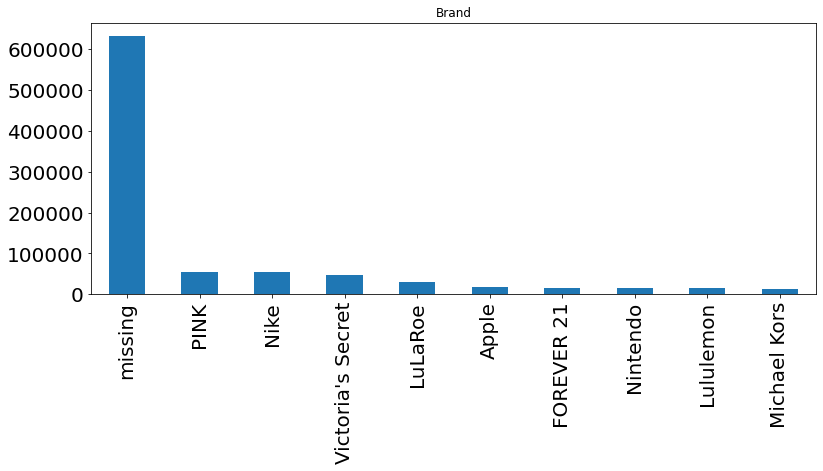

In [22]:
print("No of unique values in brand are:",x_train['brand_name'].nunique())
print("No of unique values in brand are is:",x_train['brand_name'].value_counts())
x_train.brand_name.value_counts()[:10].plot(kind = 'bar',figsize = (13,5), title="Brand",fontsize=20)

# Display Top 20 Expensive Brands By Mean Price


**CONCLUSION**
>> We could see most of the brand names are missing .

**Item description:**


Word plot gives most frequent words used in the field

**TEXT PRE-PROCESSING AND FEATURIZATION**




# BRAND NAME

In [23]:
#this function assigns a value 1 if a product has brand_name else 0"""

def branded(data):
   is_branded=[]
   for i in data['brand_name']:
      if i=='missing': 
          is_branded.append(0) 
      else: 
          is_branded.append(1)
   return is_branded
x_train['is_branded']=branded(x_train)
x_test['is_branded']=branded(x_test)

""" 
    This function is used to guess the missing brand name.
    It will check for an existing brand name mentioned in the item name section and also category of brnad name and populates the missing brand
"""
def fill_brand(row):
    brand, name, cn = row
    brand = brand.lower()
    if brand=='missing':
        for brand in known_brands:
            if str(brand) in name:
                return brand         
    return brand
x_train['fillmissingbrands'] = x_train[['brand_name','name', 'category_main']].apply(fill_brand, axis = 1)
x_test['fillmissingbrands'] = x_test[['brand_name','name', 'category_main']].apply(fill_brand, axis = 1)


In [24]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [27]:
preprocessed_item_description = preprocess_text(x_train['item_description'].values)
print(preprocessed_item_description[:5])
preprocessed_test_item_description = preprocess_text(x_test['item_description'].values)

  0%|          | 1390/3460725 [00:00<04:08, 13896.93it/s]

['no description yet', 'keyboard great condition works like came box ports tested work perfectly lights customizable via razer synapse app pc', 'adorable top hint lace key hole back pale pink 1x also 3x available white', 'new tags leather horses retail rm stand foot high sold pair questions please ask free shipping got storage', 'complete certificate authenticity']


100%|██████████| 3460725/3460725 [03:35<00:00, 16069.22it/s]


In [28]:
preprocessed_test_item_description[1]

'25 pcs new 7 5 x12 kraft bubble mailers lined bubble wrap protection self sealing peel seal adhesive keeps contents secure tamper proof durable lightweight kraft material helps save postage approved ups fedex usps'

In [29]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in preprocessed_test_item_description]


In [30]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039

x_train['preprocessed_item_description'] = preprocessed_item_description
x_test['preprocessed_item_description'] = preprocessed_test_item_description

word_count = x_train['preprocessed_item_description'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1])[0:10])
x_train['count'] = x_train['preprocessed_item_description'].apply(lambda x : len(str(x)))
x_test['count'] = x_test['preprocessed_item_description'].apply(lambda x : len(str(x)))



**Price Vs Description length**


Here, description length vs price has been given. From the plot, it can be said as length increases, price charged becomes lesser and lesser. Most of the items with lesser description length have more price value.

**Calculating sentiment score.**


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


#performing sentiment analysis 

def sentiment_analysis(data):
   sentiment_score = SentimentIntensityAnalyzer()
   sentiment = []
   for sentence in tqdm(data):
       sentiment.append(sentiment_score.polarity_scores(sentence))
   return sentiment


training_sentiment_score=sentiment_analysis(x_train['item_description']) 
cv_sentiment_score=sentiment_analysis(x_test['item_description'])



#Training Data Sentiment Analysis
pos,neg,neu,comp=splitting_sentiment(training_sentiment_score)
x_train['positive']=pos
x_train['negative']=neg
x_train['neutral']=neu
x_train['compound']=comp




#x_test Data Sentiment Analysis
pos,neg,neu,comp=splitting_sentiment(cv_sentiment_score)
x_test['positive']=pos
x_test['negative']=neg
x_test['neutral']=neu
x_test['compound']=comp

In [31]:
x=x_train.drop(columns=['item_description'])
x_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2,logPrice,price_level,is_branded,preprocessed_item_description,count
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts,2.397895,cheap,0,no description yet,18
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.970292,cheap,1,keyboard great condition works like came box p...,117
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.397895,cheap,1,adorable top hint lace key hole back pale pink...,73
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.583519,cheap,0,new tags leather horses retail rm stand foot h...,106
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.806662,cheap,0,complete certificate authenticity,33


**Item condition** **distribution** 


**conclusion:**
1. we can say that the distrinbution of prices among different conditions are significantly different.

**Name Feature:**

In [32]:
preprocessed_name = preprocess_text(x_train['name'].values)
print(preprocessed_name[:5])
x_train['name'] = preprocessed_name
test_preprocessed_name=preprocess_text(x_test['name'].values)
x_test['name']=test_preprocessed_name

  0%|          | 4265/3460725 [00:00<01:21, 42647.09it/s]

['mlb cincinnati reds shirt size xl', 'razer blackwidow chroma keyboard', 'ava viv blouse', 'leather horse statues', '24k gold plated rose']


100%|██████████| 3460725/3460725 [01:03<00:00, 54875.64it/s]


**Correlation between features**

**CONCLUSION:**
1. We can conclude that all of the features except train-id has some significant effect on the price  including sentiment scores.
2. We can tell that for shipping it is negatively related which states that lower prices requires buyers to pay and higher prices are paid mostly by seller.
3. Also, we could see the description length (count) is positively linear so as the length of the description  increases price seems to be higher assuming mostly it would be a positive description.





from sklearn.model_selection import train_test_split
x_train, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size=0.20)**split train data into train and cv data**

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size=0.20)

# **Feature Engineering:**

**CATEGORICAL FEATURES:**

**Name feature**

In [38]:
import joblib
import pickle

vectorizer_name = CountVectorizer(binary=True)
vectorizer_name.fit(x_train['name'].values) 
pickle.dump(vectorizer_name, open("vectorizer_name.pkl","wb"))

train_name = vectorizer_name.transform(x_train['name'].values)
cv_name = vectorizer_name.transform(x_cv['name'].values)
test_name = vectorizer_name.transform(x_test['name'].values)

**Main category**

In [39]:
vectorizer_cat = CountVectorizer(binary=True)
vectorizer_cat.fit(x_train['category_main'].values) 
pickle.dump(vectorizer_cat, open("vectorizer_cat.pkl","wb"))

train_category_main = vectorizer_cat.transform(x_train['category_main'].values)
cv_category_main = vectorizer_cat.transform(x_cv['category_main'].values)
test_category_main = vectorizer_cat.transform(x_test['category_main'].values)

**Sub Category 1**

In [40]:
vectorizer_sub1 = CountVectorizer(binary=True)
vectorizer_sub1.fit(x_train['category_sub1'].values) 
pickle.dump(vectorizer_sub1, open("vectorizer_sub1.pkl","wb"))

train_category_sub1 = vectorizer_sub1.transform(x_train['category_sub1'].values)
cv_category_sub1 = vectorizer_sub1.transform(x_cv['category_sub1'].values)
test_category_sub1 = vectorizer_sub1.transform(x_test['category_sub1'].values)


**Sub Category 2**

In [41]:
vectorizer_sub2 = CountVectorizer(binary=True)
vectorizer_sub2.fit(x_train['category_sub2'].values)
pickle.dump(vectorizer_sub2, open("vectorizer_sub2.pkl","wb"))


train_category_sub2 = vectorizer_sub2.transform(x_train['category_sub2'].values)
cv_category_sub2 = vectorizer_sub2.transform(x_cv['category_sub2'].values)
test_category_sub2 = vectorizer_sub2.transform(x_test['category_sub2'].values)


**Brand Name**

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(x_train['brand_name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_brand_name = vectorizer.transform(x_train['brand_name'].values)
train_brand_name = vectorizer.transform(x_test['brand_name'].values)

print("After vectorizations")
print(train_brand_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

In [156]:
vectorizer_brand = CountVectorizer(binary=True) 
vectorizer_brand.fit(x_train['brand_name'].values)
pickle.dump(vectorizer_brand, open("vectorizer_brand.pkl","wb"))


train_brand_name = vectorizer_brand.transform(x_train['brand_name'].values) 
cv_brand_name = vectorizer_brand.transform(x_cv['brand_name'].values) 
test_brand_name = vectorizer_brand.transform(x_test['brand_name'].values)

**Item condition**

[link text](https://)

In [160]:
from sklearn.preprocessing import OneHotEncoder

item_cond = OneHotEncoder(handle_unknown='ignore')
item_cond.fit(x_train[["item_condition_id"]])
pickle.dump(item_cond, open("item_cond.pkl","wb"))


train_condition = item_cond.transform(x_train[["item_condition_id"]])
cv_condition = item_cond.transform(x_cv[["item_condition_id"]])
test_condition = item_cond.transform(x_test[["item_condition_id"]])

#pd.DataFrame(train_condition.toarray(), columns=oe_style.categories_).head()



In [144]:
item_cond = pd.get_dummies(x_train["item_condition_id"].values)
pickle.dump(item_cond, open("item_cond.pkl","wb"))

shipping_oe = pd.get_dummies(x_train["shipping"].values)
pickle.dump(shipping_oe, open("shipping_oe.pkl","wb"))

is_branded_oe= pd.get_dummies(x_train["is_branded"].values)
pickle.dump(is_branded_oe, open("is_branded_oe.pkl","wb"))

#one_hot_encoded_cv_predictors = pd.get_dummies(x_cv[["item_condition_id"]])
#one_hot_encoded_test_predictors = pd.get_dummies(x_test[["item_condition_id"]])


#final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                   # join='left', 
                                                                   # axis=1)

**Shipping**

In [158]:
shipping_oe= OneHotEncoder(handle_unknown='ignore')
shipping_oe.fit(x_train[["shipping"]])
pickle.dump(shipping_oe, open("shipping_oe.pkl","wb"))

train_shipping = shipping_oe.transform(x_train[["shipping"]])
cv_shipping = shipping_oe.transform(x_cv[["shipping"]])
test_shipping = shipping_oe.transform(x_test[["shipping"]])

pd.DataFrame(train_shipping.toarray(), columns=oe_style.categories_).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


**Is Branded**

In [161]:
is_branded_oe = OneHotEncoder(handle_unknown='ignore')
is_branded_oe.fit(x_train[["is_branded"]])
pickle.dump(is_branded_oe, open("is_branded_oe.pkl","wb"))


cv_is_branded = is_branded_oe.transform(x_cv[["is_branded"]])
test_is_branded = is_branded_oe.transform(x_test[["is_branded"]])

pd.DataFrame(train_is_branded.toarray(), columns=oe_style.categories_).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


# ***Text Features***

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_item = TfidfVectorizer(ngram_range=(1,2), min_df=10)
vectorizer_item.fit(x_train['preprocessed_item_description'])
pickle.dump(vectorizer_item, open("vectorizer_item.pkl","wb"))

X_train_itemdes = vectorizer_item.transform(x_train['preprocessed_item_description'])
X_cv_itemdes = vectorizer_item.transform(x_cv['preprocessed_item_description'])
X_test_itemdes = vectorizer_item.transform(x_test['preprocessed_item_description'])


**Numerical features**

from sklearn.preprocessing import MinMaxScaler 
normalizer = MinMaxScaler(feature_range=(-1, 1))

normalizer.fit(x_train['negative'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(x_train['negative'].values.reshape(-1,1))
X_cv_neg_norm = normalizer.transform(x_cv['negative'].values.reshape(-1,1))
X_test_neg_norm = normalizer.transform(x_test['negative'].values.reshape(-1,1))

normalizer = MinMaxScaler(feature_range=(-1, 1))
normalizer.fit(x_train['neutral'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(x_train['neutral'].values.reshape(-1,1))
X_cv_neu_norm = normalizer.transform(x_cv['neutral'].values.reshape(-1,1)) 
X_test_neu_norm = normalizer.transform(x_test['neutral'].values.reshape(-1,1))

normalizer = MinMaxScaler(feature_range=(-1, 1))

normalizer.fit(x_train['positive'].values.reshape(-1,1))

X_train_pos_norm = normalizer.transform(x_train['positive'].values.reshape(-1,1)) 
X_cv_pos_norm = normalizer.transform(x_cv['positive'].values.reshape(-1,1)) 
X_test_pos_norm = normalizer.transform(x_test['positive'].values.reshape(-1,1))

normalizer =MinMaxScaler(feature_range=(-1, 1))

normalizer.fit(x_train['compound'].values.reshape(-1,1))

X_train_com_norm = normalizer.transform(x_train['compound'].values.reshape(-1,1))
X_cv_com_norm = normalizer.transform(x_cv['compound'].values.reshape(-1,1))
X_test_com_norm = normalizer.transform(x_test['compound'].values.reshape(-1,1))

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
normalizer = MinMaxScaler(feature_range=(-1, 1))

normalizer.fit(x_train['count'].values.reshape(-1,1))

X_train_count = normalizer.transform(x_train['count'].values.reshape(-1,1))
X_cv_count = normalizer.transform(x_cv['count'].values.reshape(-1,1))
X_test_count = normalizer.transform(x_test['count'].values.reshape(-1,1))

In [50]:
normalizer = MinMaxScaler(feature_range=(-1, 1))

normalizer.fit(y_tr.values.reshape(-1,1))

X_train_price_norm = normalizer.transform(y_tr.values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(y_cv.values.reshape(-1,1))


**Merger sparse matrices**

In [51]:
from scipy.sparse import hstack
X_tr = hstack((train_name,train_category_main,train_category_sub1,train_category_sub2, train_brand_name, train_condition, train_shipping,X_train_itemdes,train_is_branded)).tocsr()
X_cv = hstack((cv_name,cv_category_main,cv_category_sub1,cv_category_sub2, cv_brand_name, cv_condition, cv_shipping,X_cv_itemdes,cv_is_branded)).tocsr()
X_te = hstack((test_name,test_category_main,test_category_sub1,test_category_sub2, test_brand_name, test_condition, test_shipping,X_test_itemdes,test_is_branded)).tocsr()


In [116]:
features_2 = pd.get_dummies(x_train['item_condition_id'].values,sparse=True)
features_2

,1,2,3,4,5
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1185323,0,1,0,0,0
1185324,0,1,0,0,0
1185325,1,0,0,0,0
1185326,1,0,0,0,0


In [119]:
concat.shape

NameError: name 'concat' is not defined

In [118]:
train_condition[0]

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

**ML MODELLING**

**RIDGE REGRESSOR**
https://www.statisticshowto.com/ridge-regression/#:~:text=Ridge%20regression%20is%20a%20way,(correlations%20between%20predictor%20variables).

https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

In [ ]:
from sklearn.linear_model import SGDRegressor, Ridge


In [ ]:
params = {"alpha":[0.000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000,100000]}
ridge_model = Ridge(solver = "lsqr", fit_intercept=False)
lr_reg = RandomizedSearchCV(ridge_model,param_distributions =params,n_jobs=-1,random_state=0)
lr_reg.fit(X_tr, y_tr)
lr_reg.best_params_

In [ ]:
ridge_model2 = Ridge(alpha=0.01,solver = "lsqr", fit_intercept=False )
ridge_model2.fit(X_tr, y_tr)
y_pred = ridge_model2.predict(X_cv)
ridge_RMSLE = np.sqrt(mean_squared_error(y_cv, y_pred))
print(ridge_RMSLE)

In [ ]:
ridge_model2 = Ridge(alpha=0.01,solver = "lsqr", fit_intercept=False )
ridge_model2.fit(X_tr, y_tr)
pred_ridge = ridge_model2.predict(X_te)
print(pred_ridge)


In [ ]:
submission_final['price'] = np.expm1(pred_ridge)
submission_final.to_csv("submission_price2.csv", index=False)

**STOCHASTIC GRADIENT DESCENT REGRESSOR**

In [ ]:
params2 = {"alpha":[0.0001,0.001,0.01,0.1,0,1,10,100]}
model_sgd = SGDRegressor(loss='epsilon_insensitive',learning_rate='adaptive',max_iter=5,penalty='l2',fit_intercept=False,early_stopping=True)
sgd_reg = RandomizedSearchCV(model_sgd,param_distributions =params2,n_jobs=-1,random_state=1)
sgd_reg.fit(X_tr, y_tr)

In [ ]:
sgd_reg.best_params_


In [ ]:
model_sgd2 = SGDRegressor(penalty='l2',loss='epsilon_insensitive',learning_rate='adaptive',max_iter=5,fit_intercept=False,alpha=0,
                     early_stopping=True)
model_sgd2.fit(X_tr, y_tr)

In [ ]:
y_cv_pred = model_sgd2.predict(X_cv)
sgd_score = np.sqrt(mean_squared_error(y_cv, y_cv_pred))
print(sgd_score)

In [ ]:
model_sgd3 = SGDRegressor(alpha=0,penalty='l2',loss='epsilon_insensitive',learning_rate='adaptive',max_iter=5,fit_intercept=False)
model_sgd3.fit(X_tr, y_tr)
pred_sgd2 = model_sgd3.predict(X_te)
print(pred_sgd2)

In [ ]:
submission_final['price'] = np.expm1(pred_sgd2)
submission_final.to_csv("submission_price_sgd.csv", index=False)

**LIGHT GBM REGRESSOOR**

In [ ]:
pip install lightgbm


In [ ]:
from lightgbm import LGBMRegressor
params = {'learning_rate': [ 0.1,0.2,0.3,0.4,0.5],'n_estimators': [100,150, 200,250,300,400,500],
              'num_leaves': [20,30,63,80,100,120],'boosting_type' : ['gbdt'], 'max_depth' : [2,3,4,5,6,7,8]}

lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_samples': 50, 'objective': 'regression'}

lgb_model = LGBMRegressor(**lgbm_params,n_jobs=-1)
lgbm = RandomizedSearchCV(lgb_model, params, verbose=1, cv=3)
lgbm.fit(X_tr, y_tr)
print('Best hyper-parameters:', lgbm.best_params_)
print('Best score:', lgbm.best_score_)

In [ ]:
lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8, 
              'min_child_samples': 50, 'objective': 'regression',
              'boosting_type': 'gbdt','learning_rate': 0.4,
              'max_depth': 7,'n_estimators': 400,
              'num_leaves': 30 }
lgb_model2 = LGBMRegressor(**lgbm_params)
lgb_model2.fit(X_tr, y_tr)
preds2 = lgb_model2.predict(X_cv)
lgbm_score = np.sqrt(mean_squared_error(y_cv, preds2))
print(lgbm_score)

In [ ]:
lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8,  'min_child_samples': 50, 'objective': 'regression','boosting_type': 'gbdt','learning_rate': 0.4,
              'max_depth': 7,'n_estimators': 400, 'num_leaves': 30 }
lgb_model2 = LGBMRegressor(**lgbm_params)
lgb_model2.fit(X_tr, y_tr)
preds_lgbm = lgb_model2.predict(X_te)
print(preds_lgbm)

In [ ]:
submission_final['price'] = np.expm1(preds_lgbm)
submission_final.to_csv("submission_price_lgbm.csv", index=False)

# **MLP**

In [34]:
!pip install fastcache 


In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import keras
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

import gc
import re
import math
from time import time
from collections import Counter
import tensorflow as tf
import csv


from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from tensorflow.keras.models import Model,load_model

from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Input
from sklearn.metrics import mean_squared_log_error

In [36]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

In [37]:
!pip install dill

In [38]:
import dill
import pickle



**Model**

In [39]:
#ref model architecture:https://www.kaggle.com/agrigorev/tensorflow-starter-conv1d-embeddings-0-442-lb/code
#https://github.com/pjankiewicz/mercari-solution/blob/master/presentation/build/yandex.pdf
#https://www.kaggle.com/luisgarcia/keras-nn-with-parallelized-batch-training/comments#271137
#model architecture inspired by ideas from winners
def mlp_model(data):
    x = Input(shape = (data.shape[1], ), dtype = 'float32', sparse = True)     
    d1 = Dense(192, kernel_initializer='normal',activation='relu')(x)
    d2 = Dense(64, kernel_initializer='normal', activation='relu')(d1)
    d3 = Dense(64, kernel_initializer='normal', activation='relu')(d2)
    d4 = Dense(32, kernel_initializer='normal', activation='relu')(d3)
    #d3 = Dropout(0.15)(d3,training=True)
    out= Dense(1, kernel_initializer='normal')(d4)
    model = Model(x,out)
    model.summary()
    return model

In [40]:
ycv=np.expm1(y_cv.values.reshape(-1,1))+1

In [ ]:
ycv

In [88]:
model1 = mlp_model(X_tr)
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
model1.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])
filepath = "baseline_mlp_model_epochs:{epoch:03d}-val_loss:{val_loss:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor="val_loss",mode="min",save_best_only = True,verbose = 1)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./Graph2',histogram_freq=1, write_graph=True,write_grads=True,write_images=True)
#tensorboard_callback.set_model(model1)
callbacks_list = [checkpoint,tensorboard_callback]

#running different batch sizes inspired by kaggles first price winner
for i in range(4):
    model1.fit(x=X_tr.tocsr(),y=y_tr.values.reshape(-1,1),batch_size=(2**(8+i)),epochs=1,verbose=1, validation_data=(X_cv.tocsr(), y_cv.values.reshape(-1,1)),callbacks = callbacks_list)
    preds = model1.predict(X_cv.tocsr())[:, 0]
    y_pred = np.expm1(preds)
    print('Test RMSLE for batch size = ',2**(8 + i),' is ',rmsle(ycv , y_pred),'\n')  


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 363999)]          0         
_________________________________________________________________
dense (Dense)                (None, 192)               69888000  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12352     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 69,906,625
Trainable params: 69,906,625
Non-trainable params: 0
_________________________________________________

In [ ]:
mlp_pred=model1.predict(X_te.tocsr())

In [ ]:
mlp=model1.fit(x=X_tr.tocsr(),y=y_tr.values.reshape(-1,1),batch_size=256,epochs=1,verbose=1)


In [89]:
best_model = load_model('baseline_mlp_model_epochs:001-val_loss:0.183.hdf5')

preds = best_model.predict(X_te.tocsr())[:, 0]

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:

#loaded_model = joblib.load('model.pkl')
loaded_model=pickle.load(open("model.pkl","rb"))
result = loaded_model.score(X_cv.tocsr(), y_cv.values.reshape(-1,1))
print(result)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
validation_data=(X_cv, y_cv.values.reshape(-1,1))

In [ ]:
mlp_pred=mlp.predict(X_te.tocsr())

In [ ]:
submission_final['price'] = np.expm1(preds)+1
submission_final.to_csv("submission_price_mlp.csv", index=False)

### FINAL PREDICTION

In [41]:
def prediction(input_, model):
    """this function predicts the price basing on the trained model"""
    batchsize = 256
    preds = model.predict(input_.tocsr(), batch_size=batchsize)
    preds = np.exp(preds)+1
    return preds

In [42]:
import math
def handle_data(data):
    def transform_category_name(category_name):
        try:
            main, sub1, sub2= category_name.split('/')
            return main, sub1, sub2
        except:
            return ('missing', 'missing', 'missing')
        
    def branded(brand_name):
        is_branded=[]
        for i in data['brand_name']:
            if i=='missing': 
                is_branded.append(0) 
            else: 
                is_branded.append(1)
            return is_branded

    if type(data)==type(pd.DataFrame()):   #checking if it is a dataframe or not
        #data['category_name'].fillna(value='missing',inplace=True)
        
        #data['category_main'], data['category_sub1'], data['category_sub2'] = zip(*data['category_name'].apply(transform_category_name))
        data['brand_name'].fillna(value='missing',inplace=True)
        data['is_branded']=zip(*data['brand_name'].apply(branded))
        data['item_description'].fillna(value='No description yet',inplace=True)
        data['name']= data['name']
        data['shipping']=data['shipping']
        data['item_condition_id']=data['item_condition_id']
        
        if 'price' in data.columns:
            return data[['name','item_description','brand_name','category_main','category_sub1','category_sub2','is_branded','shipping','item_condition_id','price']]
        else:
            return data[['name','item_description','brand_name','category_main','category_sub1','category_sub2','is_branded','shipping','item_condition_id']]
        
    else:      #if the given data is a data point
       # if type(data['category_name'])==type(float()):  #checking for nan values in category_name
            #data['category_name'].fillna("missing",inplace=True)
           # data['category_main'], data['category_sub1'], data['category_sub2'] = zip(*data['category_name'].apply(transform_category_name))

        if type(data['brand_name'])==type(float()):     #checking for nan values in brand_name
            data['brand_name'].fillna("missing",inplace=True)
            data['is_branded']=zip(*data['brand_name'].apply(branded))

        if type(data['item_description'])==type(float()):  #checking for nan values in item_description
            data['item_description'].fillna("No description yet",inplace=True)
            #data['category_main'], data['category_sub1'], data['category_sub2'] =data['category_name'].split('/')
        if data['brand_name']=='missing': 
            data["is_branded"]=0
        else: 
            data["is_branded"]=1
        data['name']= data['name']
        data['shipping']=data['shipping']
        data['item_condition_id']=data['item_condition_id']

        if 'price' in dict(data).keys():  #if price exits we will return it
            return data[['name','item_description','brand_name','category_main','category_sub1','category_sub2','is_branded','shipping','item_condition_id','price']]
        else:
            return data[['name','item_description','brand_name','category_main','category_sub1','category_sub2','is_branded','shipping','item_condition_id']]
    return False

In [43]:
def price_suggestion(X):

    X=handle_data(X)          
    if 'price' in dict(X).keys():
        target=X['price']  #checking if price contains in it or not
    else:
        target='we predicted it'
    vectorizer_name=pickle.load(open("vectorizer_name.pkl","rb"))
    bow_name=vectorizer_name.transform(X['name'].values)  #name vectorization
    
    vectorizer_item=pickle.load(open("vectorizer_item.pkl", 'rb'))
    bow_item=vectorizer_item.transform(X['item_description'].values) 

    vectorizer_cat=pickle.load(open("vectorizer_cat.pkl","rb"))
    bow_cat=vectorizer_cat.transform(X['category_main'].values) 
    
    vectorizer_sub1=pickle.load(open("vectorizer_sub1.pkl","rb"))
    bow_sub1=vectorizer_sub1.transform(X['category_sub1'].values)
    #text vectorization
    
    vectorizer_sub2=pickle.load(open("vectorizer_sub2.pkl","rb"))
    bow_sub2=vectorizer_sub2.transform(X['category_sub2'].values)
    #text vectorization
    
    vectorizer_brand=pickle.load(open("vectorizer_brand.pkl","rb"))
    bow_brand=vectorizer_brand.transform(X['brand_name'].values)  #text vectorization

    is_brand_oe=pickle.load(open("is_branded_oe.pkl","rb"))
    is_brand=is_brand_oe.transform(X[['is_branded']])
    
    item_cond_oe=pickle.load(open("item_cond.pkl","rb"))
    item_cond=item_cond_oe.transform(X[['item_condition_id']])
    
    shipping_oe=pickle.load(open("shipping_oe.pkl","rb"))
    shipping=shipping_oe.transform(X[['shipping']])
    


    concat=hstack([bow_name,bow_item,bow_cat,bow_sub1,bow_sub2,bow_brand,is_brand,item_cond,shipping])   #concatinating all the features
    best_model = load_model('baseline_mlp_model_epochs:001-val_loss:0.183.hdf5')

    #preds = best_model.predict(X_te.tocsr())[:, 0]
    predicted_price=[prediction(concat,best_model)] 
    return predicted_price[0],target  

In [48]:
x=x_test.reindex([113])
x

,test_id,name,item_condition_id,brand_name,shipping,item_description,category_main,category_sub1,category_sub2,is_branded,preprocessed_item_description,count
113,113,rue football shirt size 3x,3,rue,1,95% rayon 5% spandex,Women,Tops & Blouses,T-Shirts,1,95 rayon 5 spandex,18


In [49]:
predicted,target=price_suggestion(x_test.reindex([110]))  #some random train data point.
if target!='we predicted it':
  print("Predicted price is: {} and Actual price of the product is: {}".format(predicted,target))
else:
  print("Predicted price for the given product is: {}".format(predicted[0]))


Predicted price for the given product is: 5.254732131958008


In [46]:
from sklearn.metrics import mean_squared_error
def error_metric(X,Y):
  """this function returns the rmsle error on the target and predicted score
     Input_format: X: data point(must be 7 or 8 dimensional datapoint) (vector)
                   Y: float 
     Output format: float (rmsle score) """
  predicted_score=price_suggestion(X,vectorizer_name,vectorizer_text)
  return rmsle([Y],[predicted_score[0]])

In [ ]:
error=error_metric(train_data.iloc[110],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

error=error_metric(train_data.iloc[170],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

**CNN 1D + EMBEDDINGS**

In [ ]:
pip install fastcache

# **CNN**

glove  embeddign

In [ ]:
from sklearn.preprocessing import Normalizer
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Conv1D, Conv2D, MaxPool1D, MaxPool2D, AveragePooling1D, GlobalAveragePooling1D, \
                                     Flatten, Dropout, Dense, BatchNormalization, LayerNormalization, Concatenate
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from keras.utils import to_categorical
from keras.layers import Embedding
from keras.initializers import Constant

In [ ]:
#submodels inspired by #ref:https://github.com/chintan1995/mercari-price-suggestion-challenge/blob/4c96f71d18e9de3823323e18ca38e8ef9f5c72ae/Models/4.%20CNN_DL_Mercari_Price_Suggestion.ipynb

In [ ]:
# How does embedding layer work,
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

filename = 'glove.6B.50d.txt'
def text_embeddings(text_train, text_cv,text_test):
    # Word Tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text_train)
    encoded_docs_train = tokenizer.texts_to_sequences(text_train)
    encoded_docs_cv = tokenizer.texts_to_sequences(text_cv)
    encoded_docs_test = tokenizer.texts_to_sequences(text_test)

# Getting the 'max len' of doc among the text_train
    len_docs = []
    for doc in text_train:
        splitted_doc = doc.split()
        len_docs.append(len(splitted_doc))
    max_len_doc = max(len_docs)

    text_train_padded = pad_sequences(encoded_docs_train, maxlen=max_len_doc, padding='post')
    text_cv_padded = pad_sequences(encoded_docs_cv, maxlen=max_len_doc, padding='post')
    text_test_padded = pad_sequences(encoded_docs_test, maxlen=max_len_doc, padding='post')
#ref: https://ireneli.eu/2017/01/17/tensorflow-07-word-embeddings-2-loading-pre-trained-vectors/
    
    #glove embeddings:
    vocab_size = len(tokenizer.word_index) + 1
    embeddings_index = dict()
    
    with open('glove.6B.50d.txt') as f:

        for line in f:
            w_coef = line.split()
            word = w_coef[0]
            coefs = asarray(w_coef[1:], dtype='float32')
            embeddings_index[word]=coefs

    embedding_matrix = zeros((vocab_size, 50))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)   
            
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix, vocab_size, max_len_doc, text_train_padded, text_cv_padded,text_test_padded

In [ ]:
def text_model_pipeline(input_len, vocab_size, embedding_matrix):
    #sub-model for the text data using embedding layer, 1D CNN, Maxpooling.
    input_layer = Input(shape=input_len)
    e_layer = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_matrix], input_length=input_len, trainable=True)(input_layer)   
    conv_1 = Conv1D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=initializers.glorot_normal(seed=0), 
                activation='relu', kernel_regularizer=regularizers.l2())(e_layer)
    conv_1 = MaxPool1D(pool_size=20, strides=1, padding='same')(conv_1)
    conv_1 = Flatten()(conv_1)
    out = conv_1
    model = Model(inputs=input_layer ,outputs=out)
    return model


In [ ]:
x_train['concat_train_brand+name'] = x_train['name']+ " " + x_train['brand_name'] + " "+x_train['preprocessed_item_description']
x_cv['concat_cv_brand+name']  = x_cv['name']+" "+ x_cv['brand_name']+" "+x_cv['preprocessed_item_description']
x_test['concat_test_brand+name']  = x_test['name']+" "+ x_test['brand_name']+" "+x_test['preprocessed_item_description']

desc_embedding_matrix, desc_vocab_size, desc_max_len_doc, desc_text_train_padded,desc_text_cv_padded, desc_text_test_padded = text_embeddings(x_train['preprocessed_item_description'].values,x_cv['preprocessed_item_description'].values, x_test['preprocessed_item_description'].values)                                                      
name_embedding_matrix, name_vocab_size, name_max_len_doc, name_text_train_padded,name_text_cv_padded,name_text_test_padded = text_embeddings(x_train['concat_train_brand+name'].values, x_cv['concat_cv_brand+name'].values,x_test['concat_test_brand+name'].values)

desc_flat_model = text_model_pipeline(desc_max_len_doc, desc_vocab_size, desc_embedding_matrix)
name_flat_model = text_model_pipeline(name_max_len_doc, name_vocab_size, name_embedding_matrix)


**Categorical features**

In [ ]:
# Embedding categorical data
#ref: https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/56876351#56876351
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
#This function will do Label encoding of the categorical feature taking unknown values into consideration   

def categorical_embeddings(cat_train, cat_cv, cat_test):
    
    vocab_size = len(cat_train.unique())+1
    le = LabelEncoder()
    le.fit(cat_train.values)
   
    cat_cv = cat_cv.map(lambda s: '<unknown>' if s not in le.classes_ else s)
    cat_test = cat_test.map(lambda s: '<unknown>' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, '<unknown>')
    encoded_train = le.transform(cat_train.values)
    encoded_cv = le.transform(cat_cv.values)
    encoded_test = le.transform(cat_test.values)

    return vocab_size, encoded_train, encoded_cv , encoded_test

In [ ]:
#sub-model for the categorical data. It will use embedding layer to embedd the categories.

def categorical_model_pipeline(input_len, vocab_size): 
    input_layer = Input(shape=input_len)
    e_layer  = Embedding(input_dim=vocab_size, output_dim=32, input_length=input_len, trainable=True)(input_layer)
    flat1 = Flatten()(e_layer)
    out = flat1
    model = Model(inputs=input_layer ,outputs=out)
    return model

In [ ]:
#Ref:concatenating categorical fields inspired by https://github.com/pjankiewicz/mercari-solution/blob/master/presentation/build/yandex.pdf
#https://github.com/pjankiewicz/mercari-solution/blob/master/presentation/build/yandex.pdf
#concatenating text features will give more insight into what the product is about. This is inspired by winners featurization techniques
x_train['concatenating_categories'] = x_train['brand_name']+ " " + x_train['category_main']+ " " + x_train['category_sub1']+ " "+x_train['category_sub2']
x_cv['concatenating_categories'] = x_cv['brand_name']+ " " + x_cv['category_main']+ " " + x_cv['category_sub1']+ " "+x_cv['category_sub2']
x_test['concatenating_categories'] = x_test['brand_name']+ " " + x_test['category_main']+ " " + x_test['category_sub1']+ " "+x_test['category_sub2']

cat_vocab_size, cat_encoded_train, cat_encoded_cv, cat_encoded_test = categorical_embeddings(x_train['concatenating_categories'], x_cv['concatenating_categories'], x_test['concatenating_categories'])


cat_flat_model = categorical_model_pipeline(1,cat_vocab_size)

**low cardinal categorical features**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(X_train,X_cv,X_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train.to_numpy().reshape(-1,1))
    X_train_enc = ohe.transform(X_train.to_numpy().reshape(-1,1))
    X_cv_enc = ohe.transform(X_cv.to_numpy().reshape(-1,1))

    X_test_enc = ohe.transform(X_test.to_numpy().reshape(-1,1))
    return X_train_enc.toarray(),X_cv_enc.toarray(),X_test_enc.toarray()

In [ ]:
def low_cardinal_categories(input_len,layer_name):
    input_layer = Input(shape=input_len, name=layer_name)
    flat2 = Flatten()(input_layer)
    out2 = flat2
    model = Model(inputs=input_layer ,outputs=out2)
    return model

In [ ]:
ic_train_enc,ic_cv_enc,ic_test_enc=one_hot(x_train['item_condition_id'],x_cv['item_condition_id'], x_test['item_condition_id'])
sh_train_enc,sh_cv_enc,sh_test_enc=one_hot(x_train['shipping'],x_cv['shipping'], x_test['shipping'])
is_train_enc,is_cv_enc,is_test_enc=one_hot(x_train['is_branded'],x_cv['is_branded'], x_test['is_branded'])
#pl_train_enc,pl_cv_enc,pl_test_enc=one_hot(x_train['price_level'],x_cv['price_level'], x_test['price_level'])
#pass the encoded features to model
ic_flat_model = low_cardinal_categories(5, 'item_condition_id')
sh_flat_model = low_cardinal_categories(2, 'shipping')
is_flat_model = low_cardinal_categories(2, 'is_branded')
#pl_flat_model = low_cardinal_categories(2,'price_level')

**Numeric features**

In [ ]:
#numeric model
def numeric_model_pipeline(input_len,layer_name):
    input_layer = Input(shape=input_len,name=layer_name)
    dense = Dense(units=1,activation='linear')(input_layer)
    out = dense
    model = Model(inputs=input_layer ,outputs=out)
    return model

In [ ]:
numeric_train_input = x_train['count'].to_numpy().reshape(-1,1).shape[1]
numeric_cv_input = x_cv['count'].to_numpy().reshape(-1,1).shape[1]
numeric_test_input = x_test['count'].to_numpy().reshape(-1,1).shape[1]

#passng to numeric model
numeric_model = numeric_model_pipeline(numeric_train_input, 'numeric')

**Model**

In [ ]:
#model refernce: https://www.kaggle.com/gspmoreira/cnn-glove-single-model-private-lb-0-41117-35th
tf.keras.backend.clear_session()
combined_layers = [desc_flat_model.output, name_flat_model.output, 
                       cat_flat_model.output,ic_flat_model.output,sh_flat_model.output,is_flat_model.output, numeric_model.output]
concatenate_layer = Concatenate()(combined_layers)
dense = BatchNormalization()(concatenate_layer)
dense1 = Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.001) ,name="dense1")(dense)
dense2 = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001),name="dense2")(dense1)
concatenate_layer = Concatenate()([dense2, ic_flat_model.output, sh_flat_model.output,is_flat_model.output, numeric_model.output])
dense3 = LayerNormalization(axis=1)(concatenate_layer)
out4 = Dense(units=1, activation='linear', name='Output')(dense3)
model = Model(inputs=[desc_flat_model.input, name_flat_model.input, 
                      cat_flat_model.input,ic_flat_model.input,
                       sh_flat_model.input,is_flat_model.input, numeric_model.input],outputs=out4)
X_train_inputs = [np.array(desc_text_train_padded), np.array(name_text_train_padded), np.array(cat_encoded_train),ic_train_enc,
                      sh_train_enc, is_train_enc,x_train['count'].to_numpy().reshape(-1,1)]


X_cv_inputs = [np.array(desc_text_cv_padded), np.array(name_text_cv_padded),np.array(cat_encoded_cv),ic_cv_enc,
                     sh_cv_enc, is_cv_enc, x_cv['count'].to_numpy().reshape(-1,1)]


X_test_inputs = [np.array(desc_text_test_padded), np.array(name_text_test_padded),np.array(cat_encoded_test),ic_test_enc,
                     sh_test_enc, is_test_enc, x_test['count'].to_numpy().reshape(-1,1)]


In [ ]:
# For more info on EarlyStoppingdelCheckpoint, refer https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# https://stackoverflow.com/a/42963385/7697658
lrschedule_1 = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.70, mode='min')

In [ ]:
callbacks=[earlystop]
epochs = 10
BATCH_SIZE = 1024
adam = Adam(learning_rate=0.003,epsilon=1e-08)
model.compile(optimizer=adam, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(x=X_train_inputs,
            y=np.array(y_tr).astype('float32').reshape(-1,1),batch_size=BATCH_SIZE, epochs=epochs, 
            verbose=True, validation_data=(X_cv_inputs, np.array(y_cv).astype('float32').reshape(-1,1)))

In [ ]:
cnn_preds = model.predict(X_test_inputs)


In [ ]:
submission_final['price'] = np.exp(cnn_preds)+1
submission_final.to_csv("submission_price_cnn.csv", index=False)

# **CNN+LSTM model**

# **text features**

In [ ]:
def text_model_lstm_pipeline(input_len, vocab_size, embedding_matrix,name):
    #sub-model for the text data using embedding layer, 1D CNN, Maxpooling.
    input_layer = Input(shape=input_len)
    e_layer = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_matrix], input_length=input_len, trainable=True)(input_layer)   
    conv_1 = Conv1D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=initializers.glorot_normal(seed=0), 
                activation='relu', kernel_regularizer=regularizers.l2())(e_layer)
    #conv_1 = MaxPool1D(pool_size=20, strides=1, padding='same')(conv_1)
    #conv_1 = Flatten()(conv_1)
    lstm = LSTM(units=16, name='lstm2'+name)(conv_1)
    out = lstm
    model = Model(inputs=input_layer ,outputs=out)
    return model


In [ ]:
desc_flat_lstm_model = text_model_lstm_pipeline(desc_max_len_doc, desc_vocab_size, desc_embedding_matrix, name="desc")
name_flat_lstm_model = text_model_lstm_pipeline(name_max_len_doc, name_vocab_size, name_embedding_matrix, name="name")

In [ ]:
#model refernce: https://www.kaggle.com/gspmoreira/cnn-glove-single-model-private-lb-0-41117-35th
tf.keras.backend.clear_session()
combined_layers = [desc_flat_lstm_model.output, name_flat_lstm_model.output, 
                       cat_flat_model.output,ic_flat_model.output,sh_flat_model.output,is_flat_model.output, numeric_model.output]
concatenate_layer = Concatenate()(combined_layers)
dense = BatchNormalization()(concatenate_layer)
dense1 = Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.001),name="dense1")(dense)
dense2 = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001),name="dense2")(dense1)
concatenate_layer = Concatenate()([dense2, ic_flat_model.output, sh_flat_model.output,is_flat_model.output, numeric_model.output])
dense3 = LayerNormalization(axis=1)(concatenate_layer)
out4 = Dense(units=1, activation='linear', name='Output')(dense3)
model3 = Model(inputs=[desc_flat_lstm_model.input, name_flat_lstm_model.input, 
                      cat_flat_model.input,ic_flat_model.input,
                       sh_flat_model.input,is_flat_model.input, numeric_model.input],outputs=out4)
X_train_inputs = [np.array(desc_text_train_padded), np.array(name_text_train_padded), np.array(cat_encoded_train),ic_train_enc,
                      sh_train_enc, is_train_enc,pl_train_enc,x_train['count'].to_numpy().reshape(-1,1)]
X_cv_inputs = [np.array(desc_text_cv_padded), np.array(name_text_cv_padded),np.array(cat_encoded_cv),ic_cv_enc,
                     sh_cv_enc, is_cv_enc, x_cv['count'].to_numpy().reshape(-1,1)]                     
X_test_inputs = [np.array(desc_text_test_padded), np.array(name_text_test_padded),np.array(cat_encoded_test),ic_test_enc,
                     sh_test_enc, is_test_enc,pl_test_enc, x_test['count'].to_numpy().reshape(-1,1)]


In [ ]:
callbacks=[earlystop,lrschedule_1]
epochs = 20
BATCH_SIZE = 1024
adam = Adam(learning_rate=0.01,epsilon=1e-08)
model3.compile(optimizer=adam, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model3.fit(x=X_train_inputs,
            y=np.array(y_tr).astype('float32').reshape(-1,1),batch_size=BATCH_SIZE, epochs=epochs, 
            verbose=True, validation_data=(X_test_inputs, np.array(y_cv).astype('float32').reshape(-1,1)), callbacks=[callbacks])

In [ ]:
cnn_lstm_preds = model3.predict(X_test_inputs)


In [ ]:
submission_final['price'] = np.exp(cnn_lstm_preds)+1
submission_final.to_csv("submission_price_cnn_lstm.csv", index=False)

# **ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
ada_reg = AdaBoostRegressor(random_state=1, n_estimators=10,learning_rate=0.001)
ada_reg.fit(X_tr, y_tr)

y_pred=ada_reg.predict(X_cv)

lgbm_score = np.sqrt(mean_squared_error(y_cv, y_pred))
print(lgbm_score)

In [ ]:
preds_ada = ada_reg.predict(X_te)
print(preds_ada)

In [ ]:
submission_final['price'] = np.expm1(preds_ada)
submission_final.to_csv("submission_price_ada.csv", index=False)